In [1]:
import pandas as pd
import numpy as np
import itertools

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

from sklearn.tree import DecisionTreeClassifier

from sklearn.multioutput import MultiOutputClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/msstark/Desktop/Brandeis/Field Project/code/FullData2.csv').drop('Unnamed: 0',axis = 1)
df.head()

,Date,bcom_ret,cpi_ret,pmi_ret,dxy_ret,Materials_ret,_Industrials_ret,_Consumer_Discretionary_ret,Consumer_Staples_ret,_Health_Care_ret,Financials_ret,Information_Technology_ret,Telecommunication_Services__ret,Utilities_ret,Real_Estate_ret,Energy_ret
0,1995-01-31,-0.010776,0.002003,-0.040070,-0.009804,0.064244,0.052688,0.033880,0.028613,0.011563,0.052696,0.066760,0.005734,0.000942,-0.011090,0.031235
1,1995-02-28,-0.005805,0.002665,-0.054446,-0.021737,0.053224,0.033088,0.030175,0.028865,0.027695,0.001254,0.050385,0.002281,-0.022580,-0.006164,0.050957
2,1995-03-31,0.019684,0.002658,-0.011516,-0.048744,0.012541,0.030675,-0.013433,0.028333,0.024959,0.033539,0.105226,0.021426,0.027722,0.036709,0.027098
3,1995-04-30,0.015482,0.001988,-0.093204,0.002079,0.029633,0.021884,0.044629,0.043040,0.022940,0.074939,0.037986,-0.007054,0.065561,0.014088,0.029913
4,1995-05-31,-0.012037,0.003968,-0.017131,0.007689,0.036621,0.015762,0.026340,0.016143,0.041401,0.003703,0.090244,0.027482,-0.015030,0.007169,-0.036326


In [3]:
sp500 = pd.read_csv('/Users/msstark/Desktop/Brandeis/Field Project/data/SP500.csv')
sp500.set_index('Date',inplace = True)
sp500.head()

,ret
Date,
1994-02-01,-0.030045
1994-03-01,-0.045747
1994-04-01,0.011531
1994-05-01,0.012397
1994-06-01,-0.026791


In [4]:
df.iloc[:,1:5] = df.iloc[:,1:5].shift(1).copy()
df = df.iloc[1:].copy()
df.set_index('Date',inplace = True)
df.head()

,bcom_ret,cpi_ret,pmi_ret,dxy_ret,Materials_ret,_Industrials_ret,_Consumer_Discretionary_ret,Consumer_Staples_ret,_Health_Care_ret,Financials_ret,Information_Technology_ret,Telecommunication_Services__ret,Utilities_ret,Real_Estate_ret,Energy_ret
Date,,,,,,,,,,,,,,,
1995-02-28,-0.010776,0.002003,-0.040070,-0.009804,0.053224,0.033088,0.030175,0.028865,0.027695,0.001254,0.050385,0.002281,-0.022580,-0.006164,0.050957
1995-03-31,-0.005805,0.002665,-0.054446,-0.021737,0.012541,0.030675,-0.013433,0.028333,0.024959,0.033539,0.105226,0.021426,0.027722,0.036709,0.027098
1995-04-30,0.019684,0.002658,-0.011516,-0.048744,0.029633,0.021884,0.044629,0.043040,0.022940,0.074939,0.037986,-0.007054,0.065561,0.014088,0.029913
1995-05-31,0.015482,0.001988,-0.093204,0.002079,0.036621,0.015762,0.026340,0.016143,0.041401,0.003703,0.090244,0.027482,-0.015030,0.007169,-0.036326
1995-06-30,-0.012037,0.003968,-0.017131,0.007689,0.026904,0.044611,0.032983,-0.000085,0.046298,0.026708,0.061420,0.034389,-0.003391,0.007297,0.032717


In [5]:
df.shape

(326, 15)

In [6]:
df['sp500'] = sp500[(sp500.index > '1995-02-01')&(sp500.index < '2022-05-01')].to_numpy()
df.head()

,bcom_ret,cpi_ret,pmi_ret,dxy_ret,Materials_ret,_Industrials_ret,_Consumer_Discretionary_ret,Consumer_Staples_ret,_Health_Care_ret,Financials_ret,Information_Technology_ret,Telecommunication_Services__ret,Utilities_ret,Real_Estate_ret,Energy_ret,sp500
Date,,,,,,,,,,,,,,,,
1995-02-28,-0.010776,0.002003,-0.040070,-0.009804,0.053224,0.033088,0.030175,0.028865,0.027695,0.001254,0.050385,0.002281,-0.022580,-0.006164,0.050957,0.027329
1995-03-31,-0.005805,0.002665,-0.054446,-0.021737,0.012541,0.030675,-0.013433,0.028333,0.024959,0.033539,0.105226,0.021426,0.027722,0.036709,0.027098,0.027960
1995-04-30,0.019684,0.002658,-0.011516,-0.048744,0.029633,0.021884,0.044629,0.043040,0.022940,0.074939,0.037986,-0.007054,0.065561,0.014088,0.029913,0.036312
1995-05-31,0.015482,0.001988,-0.093204,0.002079,0.036621,0.015762,0.026340,0.016143,0.041401,0.003703,0.090244,0.027482,-0.015030,0.007169,-0.036326,0.021279
1995-06-30,-0.012037,0.003968,-0.017131,0.007689,0.026904,0.044611,0.032983,-0.000085,0.046298,0.026708,0.061420,0.034389,-0.003391,0.007297,0.032717,0.031776


In [7]:
df.tail()

,bcom_ret,cpi_ret,pmi_ret,dxy_ret,Materials_ret,_Industrials_ret,_Consumer_Discretionary_ret,Consumer_Staples_ret,_Health_Care_ret,Financials_ret,Information_Technology_ret,Telecommunication_Services__ret,Utilities_ret,Real_Estate_ret,Energy_ret,sp500
Date,,,,,,,,,,,,,,,,
2021-11-30,0.025801,0.004028,0.004934,-0.001136,0.073396,0.052226,-0.003138,0.099541,0.088364,0.031204,0.004305,0.007857,0.093569,0.097351,0.029316,0.043613
2021-12-31,-0.073146,0.008753,-0.039280,0.019878,-0.068553,-0.047622,-0.097041,-0.015188,-0.069018,-0.000800,0.028917,0.017228,-0.033103,-0.085389,0.189691,-0.052585
2022-01-31,0.035197,0.006869,-0.018739,-0.000271,-0.014286,-0.011275,-0.040558,-0.015005,-0.011278,-0.014888,-0.067021,-0.051854,-0.023232,-0.050872,0.063667,-0.031360
2022-02-28,0.087661,0.005745,0.017361,0.005960,0.058222,0.032905,0.048178,0.014068,0.053932,-0.003501,-0.071348,-0.092741,0.100786,0.072754,0.087821,0.035773
2022-03-31,0.062019,0.006426,-0.025597,0.001730,-0.035197,-0.075707,-0.130267,0.024044,-0.047880,-0.100234,0.053704,0.030771,-0.042949,-0.036506,-0.016359,-0.087957


# Data Prepare

Compare each sector return with the sp500, if sector return is larger than sp500 return, encode as 1, otherwise as 0

In [8]:
col3 = df.columns[4:-1]
col4 = col3.str.replace('_ret','_sign')
col7 = col3.str.replace('_ret','_excess')

col5 = df.columns[:4]
col6 = col5.str.replace('_ret','_sign')


In [9]:
for i in range(len(col5)):
    ind = df[col5[i]].dropna().copy()    
    df[col6[i]] = (ind > 0) * 1.
    

In [10]:
for i in range(len(col3)):
    sector = df[col3[i]].dropna().copy()
    sp500  = df[df[col3[i]].isna() == False]['sp500'].copy()
    df[col7[i]] = sector - sp500
    df[col4[i]] = (sector > sp500) * 1.
    
    

In [11]:
dfSelect = df.iloc[:,15:].copy()
dfSelect.head()

,sp500,bcom_sign,cpi_sign,pmi_sign,dxy_sign,Materials_excess,Materials_sign,_Industrials_excess,_Industrials_sign,_Consumer_Discretionary_excess,...,Information_Technology_excess,Information_Technology_sign,Telecommunication_Services__excess,Telecommunication_Services__sign,Utilities_excess,Utilities_sign,Real_Estate_excess,Real_Estate_sign,Energy_excess,Energy_sign
Date,,,,,,,,,,,,,,,,,,,,,
1995-02-28,0.027329,0.0,1.0,0.0,0.0,0.025895,1.0,0.005759,1.0,0.002846,...,0.023055,1.0,-0.025049,0.0,-0.049909,0.0,-0.033493,0.0,0.023628,1.0
1995-03-31,0.027960,0.0,1.0,0.0,0.0,-0.015420,0.0,0.002715,1.0,-0.041393,...,0.077265,1.0,-0.006535,0.0,-0.000239,0.0,0.008749,1.0,-0.000862,0.0
1995-04-30,0.036312,1.0,1.0,0.0,0.0,-0.006679,0.0,-0.014428,0.0,0.008318,...,0.001674,1.0,-0.043366,0.0,0.029250,1.0,-0.022224,0.0,-0.006399,0.0
1995-05-31,0.021279,1.0,1.0,0.0,1.0,0.015343,1.0,-0.005517,0.0,0.005061,...,0.068965,1.0,0.006203,1.0,-0.036309,0.0,-0.014109,0.0,-0.057605,0.0
1995-06-30,0.031776,0.0,1.0,0.0,1.0,-0.004872,0.0,0.012835,1.0,0.001207,...,0.029644,1.0,0.002613,1.0,-0.035167,0.0,-0.024479,0.0,0.000941,1.0


In [12]:
data_col = df.columns[df.columns.str.contains('_sign')]
data = df[data_col]#.to_numpy()
#data[:5]
data.head()

,bcom_sign,cpi_sign,pmi_sign,dxy_sign,Materials_sign,_Industrials_sign,_Consumer_Discretionary_sign,Consumer_Staples_sign,_Health_Care_sign,Financials_sign,Information_Technology_sign,Telecommunication_Services__sign,Utilities_sign,Real_Estate_sign,Energy_sign
Date,,,,,,,,,,,,,,,
1995-02-28,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1995-03-31,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1995-04-30,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1995-05-31,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1995-06-30,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [15]:
print(data.iloc[:,:4].head())

            bcom_sign  cpi_sign  pmi_sign  dxy_sign
Date                                               
1995-02-28        0.0       1.0       0.0       0.0
1995-03-31        0.0       1.0       0.0       0.0
1995-04-30        1.0       1.0       0.0       0.0
1995-05-31        1.0       1.0       0.0       1.0
1995-06-30        0.0       1.0       0.0       1.0


In [16]:
print(data.iloc[:,4:].head())

            Materials_sign  _Industrials_sign  _Consumer_Discretionary_sign  \
Date                                                                          
1995-02-28             1.0                1.0                           1.0   
1995-03-31             0.0                1.0                           0.0   
1995-04-30             0.0                0.0                           1.0   
1995-05-31             1.0                0.0                           1.0   
1995-06-30             0.0                1.0                           1.0   

            Consumer_Staples_sign  _Health_Care_sign  Financials_sign  \
Date                                                                    
1995-02-28                    1.0                1.0              0.0   
1995-03-31                    1.0                0.0              1.0   
1995-04-30                    1.0                0.0              1.0   
1995-05-31                    0.0                1.0              0.0   
1995-06-

In [17]:
data.tail()

,bcom_sign,cpi_sign,pmi_sign,dxy_sign,Materials_sign,_Industrials_sign,_Consumer_Discretionary_sign,Consumer_Staples_sign,_Health_Care_sign,Financials_sign,Information_Technology_sign,Telecommunication_Services__sign,Utilities_sign,Real_Estate_sign,Energy_sign
Date,,,,,,,,,,,,,,,
2021-11-30,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2021-12-31,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
2022-01-31,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2022-02-28,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2022-03-31,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [18]:
data.shape

(326, 15)

In [19]:
weight_col = df.columns[df.columns.str.contains('_excess')]
weight = data.iloc[:,:4].merge(df[weight_col],how = 'left',left_index = True,right_index = True)
#weight = dfSelect[weight_col]
weight.head(5)

,bcom_sign,cpi_sign,pmi_sign,dxy_sign,Materials_excess,_Industrials_excess,_Consumer_Discretionary_excess,Consumer_Staples_excess,_Health_Care_excess,Financials_excess,Information_Technology_excess,Telecommunication_Services__excess,Utilities_excess,Real_Estate_excess,Energy_excess
Date,,,,,,,,,,,,,,,
1995-02-28,0.0,1.0,0.0,0.0,0.025895,0.005759,0.002846,0.001536,0.000366,-0.026076,0.023055,-0.025049,-0.049909,-0.033493,0.023628
1995-03-31,0.0,1.0,0.0,0.0,-0.015420,0.002715,-0.041393,0.000373,-0.003001,0.005579,0.077265,-0.006535,-0.000239,0.008749,-0.000862
1995-04-30,1.0,1.0,0.0,0.0,-0.006679,-0.014428,0.008318,0.006728,-0.013372,0.038628,0.001674,-0.043366,0.029250,-0.022224,-0.006399
1995-05-31,1.0,1.0,0.0,1.0,0.015343,-0.005517,0.005061,-0.005136,0.020122,-0.017575,0.068965,0.006203,-0.036309,-0.014109,-0.057605
1995-06-30,0.0,1.0,0.0,1.0,-0.004872,0.012835,0.001207,-0.031861,0.014522,-0.005068,0.029644,0.002613,-0.035167,-0.024479,0.000941


In [20]:
weight.shape

(326, 15)

## Clssification Tree Algorithm

In [21]:
def check_purity(data,x):
    
    label_column   = data[:, x:]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [22]:
def classify_data(data,x):
    classification = []
    target_columns = data[:,x:]
    
    for i in range(target_columns.shape[1]):
        unique_classes, counts_unique_classes = np.unique(target_columns[:,i], return_counts=True)

        index   = counts_unique_classes.argmax()
        classes = unique_classes[index]
        classification.append(classes)
        
    return classification

In [23]:
def get_potential_splits(data,y):
    
    potential_splits = {}
    _, n_columns     = data.shape
    
    for column_index in range(n_columns - y):        
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value   = unique_values[index]
                previous_value  = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2
                
                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [24]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    # divide the dataset based on the split column
    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above

In [25]:
def calculate_gini(data,weight,x):
    
    label_column  = data[:,x:]
    weight_column = weight[:,x:]
    
    gini_list = []
    for i in range(label_column.shape[1]):
        
        ind, counts = np.unique(label_column[:,i], return_counts=True)
        
        w1 = abs(np.sum(weight_column[:,i][label_column[:,i] == ind[0]]))
        try:
            w2 = abs(np.sum(weight_column[:,i][label_column[:,i] == ind[1]]))
        except:
            w2 = 0
               
        ws = np.array([w1,w2])

        probabilities = ws / ws.sum()
        gini = 1-np.sum(np.square(probabilities))
        gini_list.append(gini)
        
    return np.array(gini_list)

In [26]:
def calculate_overall_gini(data_below, data_above,weight_below, weight_above,x):
    below = []
    above = []
    
    for i in range(weight_below[:,x:].shape[1]):        
        pos = abs(np.sum(weight_below[:,x:][:,i][weight_below[:,x:][:,i] > 0]))
        neg = abs(np.sum(weight_below[:,x:][:,i][weight_below[:,x:][:,i] < 0]))
        below.append(pos+neg)
    below = np.array(below)
        
        
    for i in range(weight_above[:,x:].shape[1]):        
        pos = abs(np.sum(weight_above[:,x:][:,i][weight_above[:,x:][:,i] > 0]))
        neg = abs(np.sum(weight_above[:,x:][:,i][weight_above[:,x:][:,i] < 0]))
        above.append(pos+neg)
    above = np.array(above)
    
    n = below+above
    p_data_below = below / n
    p_data_above = above / n

    overall_gini =  (p_data_below * calculate_gini(data_below,weight_below,x) 
                      + p_data_above * calculate_gini(data_above,weight_above,x))
    
    return np.mean(overall_gini),np.array([p_data_below * calculate_gini(data_below,weight_below,x),
                                           p_data_above * calculate_gini(data_above,weight_above,x)])

In [27]:
def determine_best_split(data, weight, potential_splits,x):
    
    overall_gini = 9999
    
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above     = split_data(data, split_column=column_index, split_value=value)
            weight_below, weight_above = split_data(weight, split_column=column_index, split_value=value)
            current_overall_gini,gini_list = calculate_overall_gini(data_below, data_above, 
                                                                    weight_below, weight_above,x)

            if current_overall_gini <= overall_gini:
                overall_gini   = current_overall_gini
                output_list    = gini_list
                best_split_column = column_index
                best_split_value  = value
    
    return best_split_column, best_split_value, output_list


In [28]:
def decision_tree_algorithm(df, df2, counter=0, x=4, y=11, min_samples=2, max_depth=4):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data   = df.values
        weight = df2.values
    else:
        data   = df  
        weight = df2
    
    
    # base cases
    if (check_purity(data,x)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data,x)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits          = get_potential_splits(data,y)
        split_column, split_value,gini_list = determine_best_split(data, weight, potential_splits,x)
        data_below, data_above    = split_data(data, split_column, split_value)
        weight_below,weight_above = split_data(weight, split_column, split_value)
        
        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        m = max_depth
        while m > 0:
            try:                
                yes_answer = decision_tree_algorithm(data_below, weight_below, counter, x, y, min_samples, m)
                no_answer  = decision_tree_algorithm(data_above, weight_above, counter, x, y, min_samples, m)
                break
            except:
                m -= 1
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree  = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree,gini_list


In [29]:
def classify_example(example, tree, gini_list=0):
    try:      
        
        question = list(tree[0].keys())[0]
        feature_name, comparison_operator, value = question.split()
        if (isinstance(tree[0][list(tree[0].keys())[0]][0][0],float)) and (example[feature_name] <= float(value)):
            gini_list = tree[1]
            tree = tree[0]
            #question = list(tree.keys())[0]
            #feature_name, comparison_operator, value = question.split()
            #if example[feature_name] <= float(value):
            answer = tree[question][0]
            answer = np.array([answer,gini_list[0]])
        elif (isinstance(tree[0][list(tree[0].keys())[0]][1][0],float)) and (example[feature_name] > float(value)):
            gini_list = tree[1]
            tree   = tree[0]
            answer = tree[question][1]
            answer = np.array([answer,gini_list[0]])
                #answer = np.array([answer,gini_list[1]])
        else:        
            tree = tree[0]
            question = list(tree.keys())[0]
            feature_name, comparison_operator, value = question.split()
            # ask question
            if example[feature_name] <= float(value):
                answer = tree[question][0][0]
                if isinstance(answer[list(answer.keys())[0]][0][0],float):
                    gini_list = tree[question][0][1]
            else:
                answer = tree[question][1][0]
                if isinstance(answer[list(answer.keys())[0]][0][0],float):
                    gini_list = tree[question][1][1]
    except:
            question = list(tree.keys())[0]
            feature_name, comparison_operator, value = question.split()

            # ask question
            if example[feature_name] <= float(value):
                answer = tree[question][0]
                if isinstance(gini_list,np.ndarray) and (isinstance(answer,list)):
                    gini   = list(gini_list[0])
                    answer = np.array([answer,gini])
            else:
                answer = tree[question][1]
                if isinstance(gini_list,np.ndarray) and (isinstance(answer,list)):
                    gini   = list(gini_list[1])
                    answer = np.array([answer,gini])
        
    
    if (isinstance(answer, tuple)) and (isinstance(answer[0],list)):
        gini_list = list(answer[1][0]) 
        answer = np.array([answer[0],gini_list])
        return answer
    
    if isinstance(answer, tuple) and (not isinstance(answer[0],list)):
        if isinstance(answer[0][list(answer[0].keys())[0]][0][0],float):
            gini_list = answer[1]
        answer = answer[0]
          
    
    if not isinstance(answer, dict):
        
        return answer
    
    else:
        #counter += 1
        residual_tree = answer
        
        return classify_example(example, residual_tree,gini_list)
    
    

## Train-Test Split

In [30]:
test_size  = len(data)//3
test_size

108

In [31]:
data_train = data.iloc[:-test_size]
data_test  = data.iloc[-test_size:]

In [32]:
data_train[(data_train['Materials_sign'] == 0)]

,bcom_sign,cpi_sign,pmi_sign,dxy_sign,Materials_sign,_Industrials_sign,_Consumer_Discretionary_sign,Consumer_Staples_sign,_Health_Care_sign,Financials_sign,Information_Technology_sign,Telecommunication_Services__sign,Utilities_sign,Real_Estate_sign,Energy_sign
Date,,,,,,,,,,,,,,,
1995-03-31,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1995-04-30,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1995-06-30,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1995-07-31,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1995-08-31,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2012-12-31,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2013-01-31,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [33]:
bcom_list = data_train['bcom_sign'].to_numpy()
cpi_list  = data_train['cpi_sign'].to_numpy()
pmi_list  = data_train['pmi_sign'].to_numpy()
dxy_list  = data_train['dxy_sign'].to_numpy()

In [34]:
print('bcom-cpi',np.mean(bcom_list == cpi_list))
print('bcom-pmi',np.mean(bcom_list == pmi_list))
print('bcom-dxy',np.mean(bcom_list == dxy_list))

bcom-cpi 0.5458715596330275
bcom-pmi 0.5091743119266054
bcom-dxy 0.3623853211009174


In [35]:
print('cpi-pmi',np.mean(cpi_list == pmi_list))
print('cpi-dxy',np.mean(cpi_list == dxy_list))

cpi-pmi 0.45871559633027525
cpi-dxy 0.5137614678899083


In [36]:
print('pmi-dxy',np.mean(pmi_list == dxy_list))

pmi-dxy 0.5137614678899083


In [37]:
data_train.shape

(218, 15)

In [38]:
data_test.shape

(108, 15)

In [39]:
weight_train = weight.iloc[:-test_size]
weight_test  = weight.iloc[-test_size:]

In [40]:
weight_train.shape

(218, 15)

In [41]:
weight_test.shape

(108, 15)

## Training

In [42]:
tree_classifier = decision_tree_algorithm(data_train, weight_train, x=4, y=11, min_samples=2,max_depth = 4)

In [43]:
tree_classifier

({'cpi_sign <= 0.5': [({'dxy_sign <= 0.5': [({'bcom_sign <= 0.5': [({'pmi_sign <= 0.5': [[0.0,
             0.0,
             1.0,
             0.0,
             0.0,
             0.0,
             1.0,
             0.0,
             0.0,
             0.0,
             0.0],
            [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]]},
          array([[0.04547465, 0.02259928, 0.        , 0.        , 0.2880548 ,
                  0.01212844, 0.        , 0.        , 0.        , 0.15877798,
                  0.150126  ],
                 [0.1583585 , 0.17888906, 0.45202718, 0.20793583, 0.20260036,
                  0.18613396, 0.00665852, 0.14216541, 0.20401309, 0.1076792 ,
                  0.23931459]])),
         ({'pmi_sign <= 0.5': [[0.0,
             0.0,
             1.0,
             1.0,
             0.0,
             1.0,
             0.0,
             1.0,
             1.0,
             0.0,
             0.0],
            [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 

## Making predictions for each month

In [44]:
prediction = {}
for i in range(len(data)):
    testing  = data.iloc[i]
    pred = classify_example(testing, tree_classifier, gini_list=0)
    prediction[i] = pred
    

In [45]:
len(prediction)

326

### Aggregated Result Analysis

In [46]:
c = df.columns[df.columns.str.contains('_ret')]

In [47]:
pred = pd.DataFrame()
for i in range(len(prediction)):
    pred = pred.append(pd.Series(prediction[i][0]),ignore_index = True)
pred.columns = col3.to_list()
pred.index = df[c].index
pred['Year']  = pd.to_datetime(pred.index).year
pred['Month'] = pd.to_datetime(pred.index).month
pred.head()

,Materials_ret,_Industrials_ret,_Consumer_Discretionary_ret,Consumer_Staples_ret,_Health_Care_ret,Financials_ret,Information_Technology_ret,Telecommunication_Services__ret,Utilities_ret,Real_Estate_ret,Energy_ret,Year,Month
Date,,,,,,,,,,,,,
1995-02-28,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1995,2
1995-03-31,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1995,3
1995-04-30,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1995,4
1995-05-31,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1995,5
1995-06-30,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1995,6


In [48]:
pred.shape

(326, 13)

In [49]:
yearSum = pd.DataFrame()
for i in pred['Year'].unique():
    p = pd.Series(pred[pred['Year']==i].sum()[:-2].values)
    yearSum = yearSum.append(p,ignore_index=True)
yearSum.columns = col3.to_list()
yearSum.index = pred['Year'].unique()
yearSum['Total_Count'] = pred.groupby('Year').count()['Month'].copy()

In [50]:
yearSum

,Materials_ret,_Industrials_ret,_Consumer_Discretionary_ret,Consumer_Staples_ret,_Health_Care_ret,Financials_ret,Information_Technology_ret,Telecommunication_Services__ret,Utilities_ret,Real_Estate_ret,Energy_ret,Total_Count
1995,0.0,8.0,10.0,5.0,6.0,6.0,7.0,1.0,0.0,7.0,1.0,11
1996,1.0,10.0,9.0,5.0,6.0,7.0,6.0,2.0,0.0,3.0,5.0,12
1997,1.0,9.0,12.0,4.0,5.0,9.0,6.0,2.0,0.0,5.0,5.0,12
1998,3.0,1.0,10.0,4.0,8.0,7.0,8.0,5.0,1.0,11.0,3.0,12
1999,4.0,6.0,6.0,4.0,4.0,4.0,7.0,3.0,1.0,5.0,7.0,12
2000,1.0,7.0,12.0,2.0,4.0,7.0,6.0,6.0,2.0,7.0,5.0,12
2001,6.0,3.0,8.0,1.0,4.0,2.0,10.0,4.0,1.0,9.0,7.0,12
2002,3.0,10.0,9.0,3.0,3.0,3.0,6.0,3.0,0.0,5.0,6.0,12
2003,1.0,9.0,9.0,6.0,4.0,6.0,5.0,3.0,1.0,3.0,4.0,12
2004,1.0,9.0,10.0,4.0,4.0,6.0,5.0,1.0,0.0,6.0,5.0,12


In [51]:
# Under Perform Percentage
yearSum2 = yearSum.iloc[:,:-1].apply(lambda x : (x)/yearSum.iloc[:,-1])
yearSum2

,Materials_ret,_Industrials_ret,_Consumer_Discretionary_ret,Consumer_Staples_ret,_Health_Care_ret,Financials_ret,Information_Technology_ret,Telecommunication_Services__ret,Utilities_ret,Real_Estate_ret,Energy_ret
1995,0.000000,0.727273,0.909091,0.454545,0.545455,0.545455,0.636364,0.090909,0.000000,0.636364,0.090909
1996,0.083333,0.833333,0.750000,0.416667,0.500000,0.583333,0.500000,0.166667,0.000000,0.250000,0.416667
1997,0.083333,0.750000,1.000000,0.333333,0.416667,0.750000,0.500000,0.166667,0.000000,0.416667,0.416667
1998,0.250000,0.083333,0.833333,0.333333,0.666667,0.583333,0.666667,0.416667,0.083333,0.916667,0.250000
1999,0.333333,0.500000,0.500000,0.333333,0.333333,0.333333,0.583333,0.250000,0.083333,0.416667,0.583333
2000,0.083333,0.583333,1.000000,0.166667,0.333333,0.583333,0.500000,0.500000,0.166667,0.583333,0.416667
2001,0.500000,0.250000,0.666667,0.083333,0.333333,0.166667,0.833333,0.333333,0.083333,0.750000,0.583333
2002,0.250000,0.833333,0.750000,0.250000,0.250000,0.250000,0.500000,0.250000,0.000000,0.416667,0.500000
2003,0.083333,0.750000,0.750000,0.500000,0.333333,0.500000,0.416667,0.250000,0.083333,0.250000,0.333333
2004,0.083333,0.750000,0.833333,0.333333,0.333333,0.500000,0.416667,0.083333,0.000000,0.500000,0.416667


In [52]:
len(yearSum2)

28

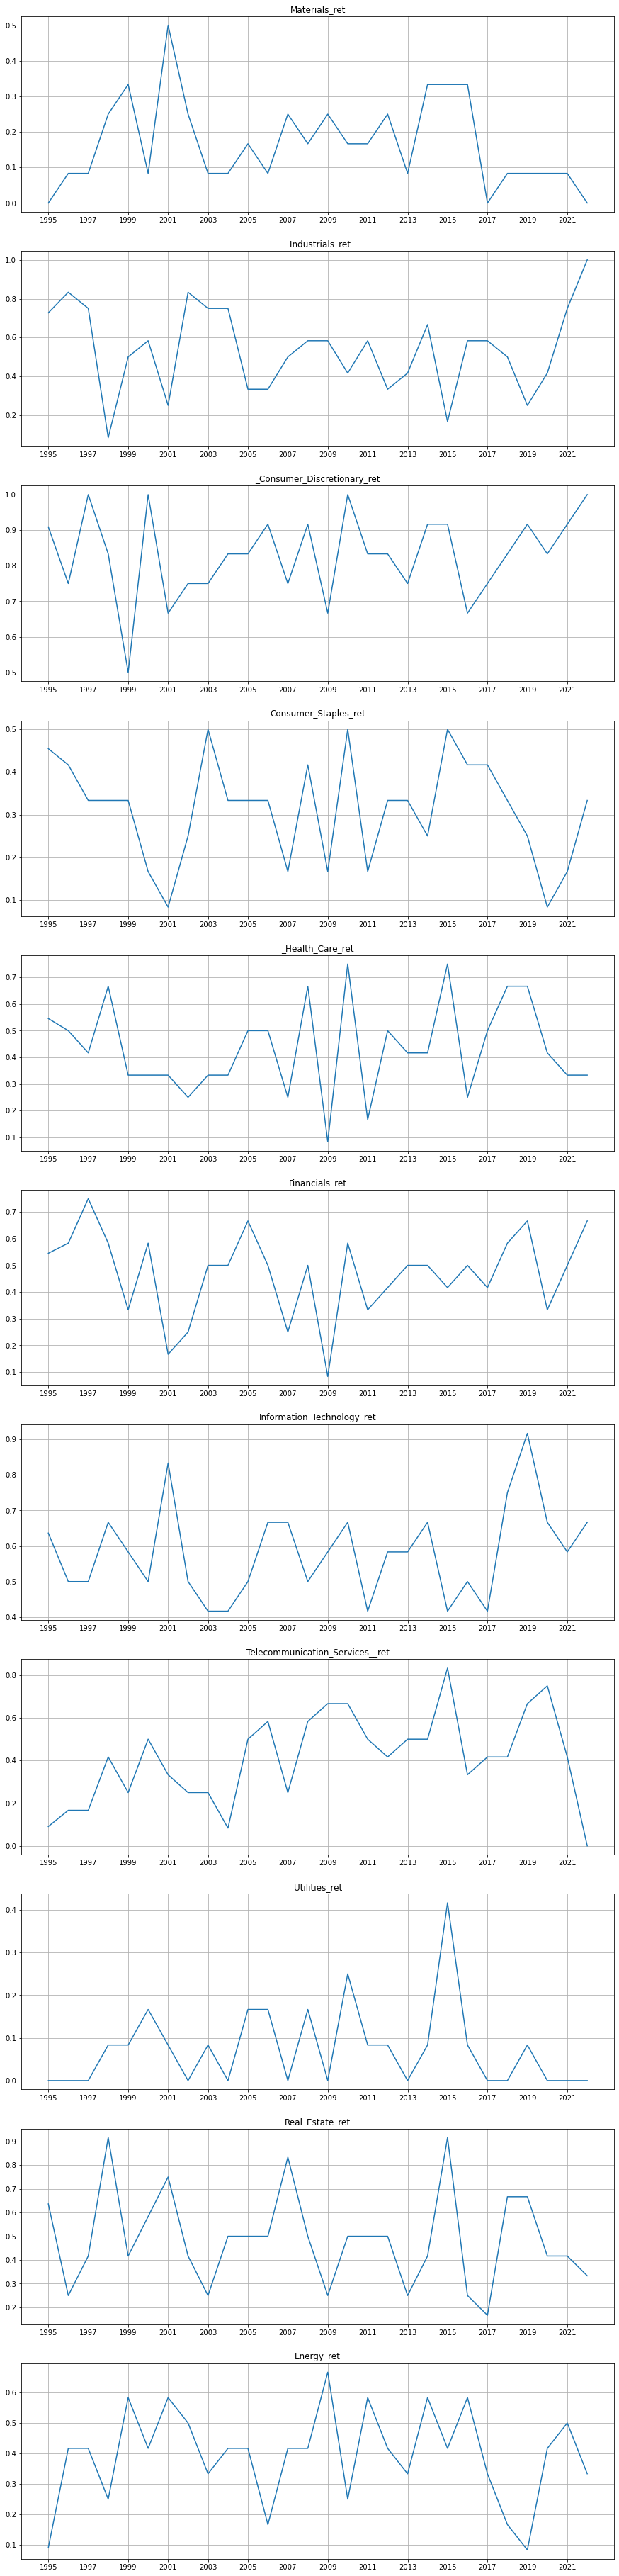

In [53]:
plt.figure(figsize = (15,66))
for i in range(len(yearSum2.columns)):
    plt.subplot(11,1,i+1)
    plt.plot(yearSum2[yearSum2.columns[i]])
    plt.xticks(yearSum2.index[::2])
    plt.title(yearSum2.columns[i],fontsize = 12)
    plt.grid()
plt.show()

## Portfolio Backtesting

In [54]:
actual_y = df[c].iloc[:,4:].copy()
actual_y.head()

,Materials_ret,_Industrials_ret,_Consumer_Discretionary_ret,Consumer_Staples_ret,_Health_Care_ret,Financials_ret,Information_Technology_ret,Telecommunication_Services__ret,Utilities_ret,Real_Estate_ret,Energy_ret
Date,,,,,,,,,,,
1995-02-28,0.053224,0.033088,0.030175,0.028865,0.027695,0.001254,0.050385,0.002281,-0.022580,-0.006164,0.050957
1995-03-31,0.012541,0.030675,-0.013433,0.028333,0.024959,0.033539,0.105226,0.021426,0.027722,0.036709,0.027098
1995-04-30,0.029633,0.021884,0.044629,0.043040,0.022940,0.074939,0.037986,-0.007054,0.065561,0.014088,0.029913
1995-05-31,0.036621,0.015762,0.026340,0.016143,0.041401,0.003703,0.090244,0.027482,-0.015030,0.007169,-0.036326
1995-06-30,0.026904,0.044611,0.032983,-0.000085,0.046298,0.026708,0.061420,0.034389,-0.003391,0.007297,0.032717


In [55]:
actual_y.shape

(326, 11)

In [56]:
def excess_return(df,benchCol,portCol):
    excess_ret = []
    for i in range(len(df)-12):
        select = df.iloc[i:i+12].copy()
        bench  = select[benchCol]
        port   = select[portCol]
        te     = (port - bench)
        excess_ret.append(te)
    return np.mean(excess_ret)

In [57]:
def tracking_error(df,benchCol,portCol):
    tracking_err = []
    for i in range(len(df)-12):
        select = df.iloc[i:i+12].copy()
        bench  = select[benchCol]
        port   = select[portCol]
        te     = np.std(port - bench)
        tracking_err.append(te)
    return np.mean(tracking_err)
    

In [58]:
def info_ratio(df,benchCol, portCol, rf):
    df    = df[[benchCol,portCol]].dropna().copy()
    annual_IR = []
    for i in range(len(df)-12):
        select = df.iloc[i:i+12].copy()
        # systematic risk
        beta  = select.cov().to_numpy()[0][1] / select[benchCol].var()
        diff  = select[portCol] - select[benchCol]
        sigma = np.std(diff)
        alpha = select[portCol] - rf - beta * (select[benchCol] - rf)
        IR    = alpha/sigma
        annual_IR.append(IR)
    return np.mean(annual_IR)

In [59]:
def sharpe_ratio(df,portCol,rf):
    annual_SR = []
    for i in range(len(df)-12):
        select = df.iloc[i:i+12].copy()
        portfolio = select[portCol]
        sigma = np.std(portfolio)
        SR = (portfolio - rf)/sigma
        annual_SR.append(SR)
    return np.mean(annual_SR)

In [60]:
def info_coef(df1,df2):
    # total length of the dataframe
    T = df1.shape[0]
    # Information Coefficient at each time point
    ICt = []
    for i in range(T):
        # sector return in each month
        rank1  = df1.iloc[i].rank(ascending = False).dropna().to_numpy()
        
        # ranking for each sector based on the correlation coefficient
        rank2 = df2.iloc[i][(df1.iloc[i].isna()==False).to_list()].rank(ascending = False).dropna().to_numpy()
        # sector number
        n = len(rank1)
        
        numerator = np.matmul(rank1,rank2) - np.sum(rank2)*np.sum(rank1)/n       
        alpha2    = np.sum(np.square(rank2)) - np.square(np.sum(rank2))/n
        rank1_2   = np.sum(np.square(rank1)) - np.square(np.sum(rank1))/n
        denominator = np.sqrt(alpha2 * rank1_2)
        
        # Information coefficient at each predicting point
        ICt.append(numerator/denominator)
    
    annual_IC = []
    for j in range(len(ICt) - 12):
        select = ICt[j:j+12]
        annual_IC.append(np.mean(select))        
   
    return np.mean(annual_IC)

In [61]:
def hit_rate(df, benchCol,portCol):
    annual_hit = []
    for i in range(len(df)-12):       
        diff = (df[portCol] - df[benchCol]) > 0
        annual_hit.append(np.mean(diff))
    return np.mean(annual_hit)

In [62]:
def MDD(df,col):
    port = df[col].dropna().copy()
    peak = port[0]
    mdd  = np.inf
    for i in range(len(port)-12):
        tmp  = port.iloc[i:i+12]
        peak = max(tmp)
        peak_ind = tmp[tmp == peak].index[0]
        trough   = min(tmp[tmp.index >= peak_ind])
        mdd      = min((trough - peak)/peak,mdd)
        
    return mdd

## Equally Weighting within each group

In [63]:
base_w = np.array([0.026,0.08,0.118,0.062,0.133,0.115,0.281,0.096,0.026,0.026,0.037])

In [64]:
change = 1

In [65]:
portfolio1 = []
actual_y   = df[c].iloc[:,4:].copy()
columns    = actual_y.columns
weights1 = {}
for i in range(len(prediction)):    
    ret = actual_y.iloc[i][~actual_y.iloc[i].isna()]   
    try:
        signal = prediction[i][0][~actual_y.iloc[i].isna()]
    except:
        signal = prediction[i][0]
    
    n  = len(ret)
    n1 = signal * (change/n)*(np.sum(signal != 1)/n)
    n2 = (signal - 1) * (change/n)*(np.sum(signal != 0)/n)
    
    w     = n1 + n2
    
    adj_w = w + base_w
    weights1[i] = adj_w
    
    #adj_w /= sum(adj_w)
        
    port_r = sum(ret*adj_w)
    portfolio1.append(port_r)
    
weights1 = pd.DataFrame.from_dict(weights1).T

In [66]:
adj_w

array([-0.00705785,  0.13785124,  0.17585124,  0.02894215,  0.09994215,
        0.17285124,  0.24794215,  0.06294215, -0.00705785, -0.00705785,
        0.09485124])

In [67]:
compare1 = df[['sp500']].copy()
compare1.reset_index(inplace = True)

compare1['port'] = pd.Series(portfolio1)
compare1.set_index('Date',inplace = True)
compare1.head()

,sp500,port
Date,,
1995-02-28,0.027329,0.025866
1995-03-31,0.027960,0.040607
1995-04-30,0.036312,0.033599
1995-05-31,0.021279,0.032506
1995-06-30,0.031776,0.042901


In [68]:
compare1.shape

(326, 2)

### Full Sample Compare

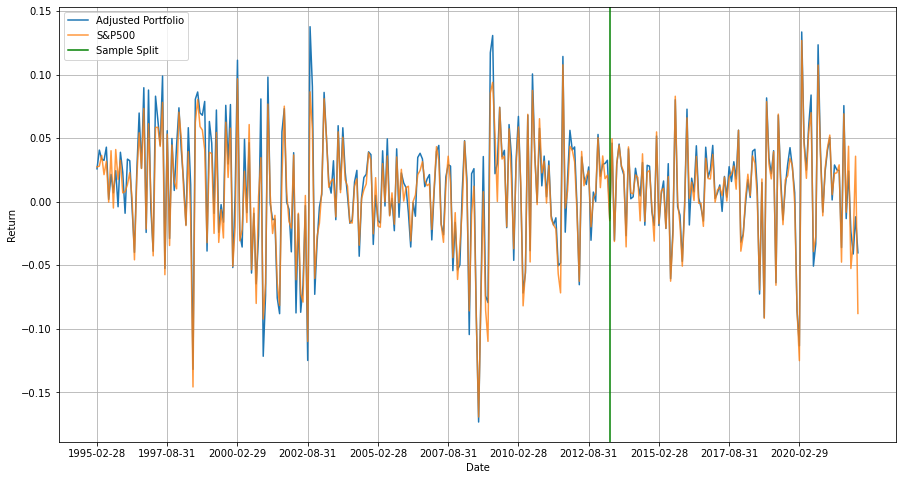

In [69]:
plt.figure(figsize = (15,8))
plt.plot(compare1['port'],label = 'Adjusted Portfolio')
plt.plot(compare1['sp500'],label = 'S&P500',alpha = 0.8)
plt.axvline(x='2013-05-31', color='g', label='Sample Split')
plt.xticks(np.arange(0,len(compare1),30))
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [70]:
compare1.describe()

,sp500,port
count,326.000000,326.000000
mean,0.007536,0.010860
std,0.043533,0.046918
min,-0.169425,-0.173410
25%,-0.017298,-0.014695
50%,0.012173,0.015362
75%,0.035695,0.039661
max,0.126844,0.137715


### In-sample

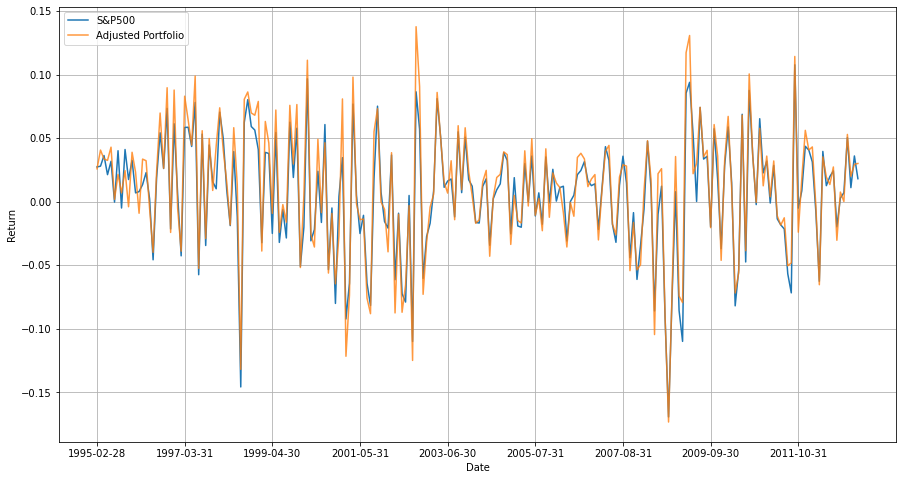

In [71]:
plt.figure(figsize = (15,8))
plt.plot(compare1.iloc[:-108]['sp500'],label = 'S&P500')
plt.plot(compare1.iloc[:-108]['port'],label = 'Adjusted Portfolio',alpha = 0.8)
#plt.axvline(x='2013-05-31', color='g', label='Sample Split')
plt.xticks(np.arange(0,len(compare1.iloc[:-108]),25))
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [72]:
compare1.iloc[:-108].describe()

,sp500,port
count,218.000000,218.000000
mean,0.006492,0.010494
std,0.045135,0.050120
min,-0.169425,-0.173410
25%,-0.018684,-0.016650
50%,0.011209,0.015040
75%,0.035983,0.040557
max,0.107723,0.137715


### Out-of-sample

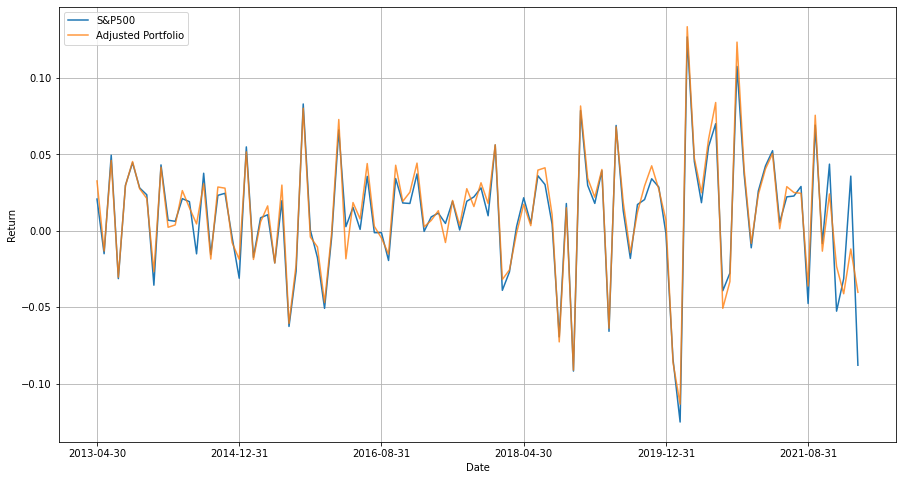

In [73]:
plt.figure(figsize = (15,8))
plt.plot(compare1.iloc[-108:]['sp500'],label = 'S&P500')
plt.plot(compare1.iloc[-108:]['port'],label = 'Adjusted Portfolio',alpha = 0.8)
#plt.axvline(x='2013-05-31', color='g', label='Sample Split')
plt.xticks(np.arange(0,len(compare1.iloc[-108:]),20))
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [74]:
compare1.iloc[-108:].describe()

,sp500,port
count,108.000000,108.000000
mean,0.009643,0.011599
std,0.040225,0.039887
min,-0.125119,-0.113438
25%,-0.012102,-0.012239
50%,0.017520,0.016087
75%,0.031209,0.031723
max,0.126844,0.133545


### Portfolio Comparison

In [75]:
# In-sample
IR1_1 = info_ratio(compare1.iloc[:-108],'sp500', 'port', 0.06/12)
IR1_1

0.38615930196391585

In [76]:
# Out-of-sample
IR1_2 = info_ratio(compare1.iloc[-108:],'sp500', 'port', 0.06/12)
IR1_2

0.3288415476322764

In [77]:
# Full sample
IR1_3 = info_ratio(compare1,'sp500', 'port', 0.06/12)
IR1_3

0.36509250487336214

In [78]:
SR1_1 = sharpe_ratio(compare1.iloc[:-108],'port',0.06/12)
SR1_1

0.16210475836087931

In [79]:
SR1_2 = sharpe_ratio(compare1.iloc[-108:],'port',0.06/12)
SR1_2

0.2577536400356502

In [80]:
SR1_3 = sharpe_ratio(compare1,'port',0.06/12)
SR1_3

0.20578019824352456

In [81]:
print('In-sample Information Coefficient: ',info_coef(weights1.iloc[:-108],actual_y.iloc[:-108]))
print('Out-of-sample Information Coefficient: ',info_coef(weights1.iloc[-108:],actual_y.iloc[-108:]))
print('Full sample Information Coefficient: ',info_coef(weights1,actual_y))

In-sample Information Coefficient:  0.09209388942576033
Out-of-sample Information Coefficient:  0.10270697014148648
Full sample Information Coefficient:  0.10065303265216485


In [82]:
print('In-sample Hit Rate: ',hit_rate(compare1.iloc[:-108], 'sp500','port'))
print('Out-of-sample Hit Rate: ',hit_rate(compare1.iloc[-108:], 'sp500','port'))
print('Full-sample Hit Rate: ',hit_rate(compare1, 'sp500','port'))

In-sample Hit Rate:  0.6376146788990826
Out-of-sample Hit Rate:  0.611111111111111
Full-sample Hit Rate:  0.6288343558282208


In [83]:
print('Benchmark Maximum Drawdown:',MDD(compare1,'sp500'))
print('In-sample Maximum Drawdown: ',MDD(compare1.iloc[:-108],'port'))
print('Out-of-sample Maximum Drawdown: ',MDD(compare1.iloc[-108:],'port'))
print('Full-sample Maximum Drawdown: ',MDD(compare1,'port'))

Benchmark Maximum Drawdown: -4.563328946548292
In-sample Maximum Drawdown:  -4.609983006789908
Out-of-sample Maximum Drawdown:  -2.667982406804247
Full-sample Maximum Drawdown:  -4.609983006789908


In [84]:
print('Full Sample Tracking Error: ',tracking_error(compare1,'sp500','port'))
print('In-Sample Tracking Error: ',tracking_error(compare1.iloc[:-108],'sp500','port'))
print('Out-of-Sample Tracking Error: ',tracking_error(compare1.iloc[-108:],'sp500','port'))

Full Sample Tracking Error:  0.009825796049741283
In-Sample Tracking Error:  0.011733908763811095
Out-of-Sample Tracking Error:  0.006144794984525852


In [85]:
print('Full Sample Excess Return: ',excess_return(compare1,'sp500','port'))
print('In-Sample Excess Return: ',excess_return(compare1.iloc[:-108],'sp500','port'))
print('Out-of-Sample Excess Return: ',excess_return(compare1.iloc[-108:],'sp500','port'))

Full Sample Excess Return:  0.003384204506469431
In-Sample Excess Return:  0.00414072627687486
Out-of-Sample Excess Return:  0.0019830947393740077


In [86]:
compare1['sp500_Accu'] = (1+compare1['sp500']).cumprod()
compare1['portAccu'] = (1+compare1['port']).cumprod()

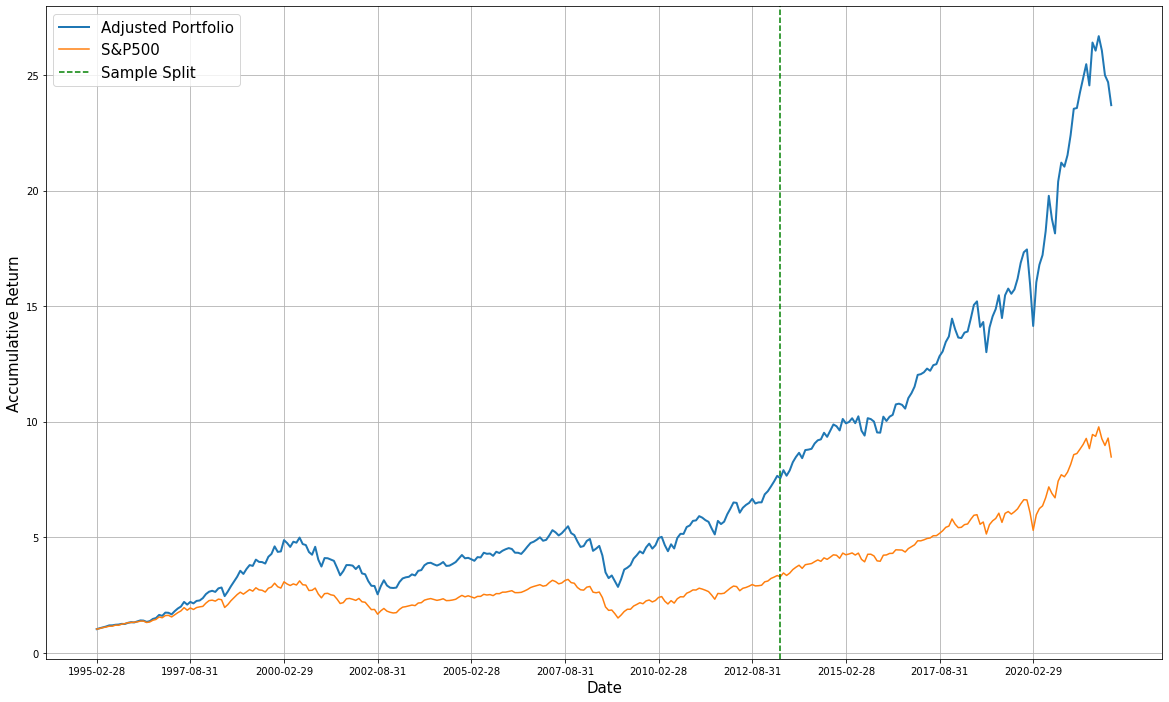

In [87]:
plt.figure(figsize = (20,12))
plt.plot(compare1['portAccu'],label = 'Adjusted Portfolio',linewidth = 2)
plt.plot(compare1['sp500_Accu'],label = 'S&P500')
plt.axvline(x='2013-05-31', color='g', label='Sample Split',linestyle = '--')
plt.xticks(np.arange(0,len(compare1),30))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Accumulative Return',fontsize = 15)
plt.legend(loc = 'upper left',fontsize = 15)
plt.grid()
plt.show()

## Adjust weights using gini index

In [88]:
portfolio2 = []
actual_y   = df[c].iloc[:,4:].copy()
columns    = actual_y.columns
weights2   = {}
for i in range(len(prediction)):    
    ret    = actual_y.iloc[i][~actual_y.iloc[i].isna()]    
    try:
        signal = prediction[i][0][~actual_y.iloc[i].isna()]
        gini   = prediction[i][1][~actual_y.iloc[i].isna()]
    except:
        signal = prediction[i][0]
        gini   = prediction[i][1]
    
    gini   = pd.Series(gini, index = columns)  
    
    over   = gini[signal==1].rank(ascending = False,method='dense')
    under  = gini[signal==0].rank(ascending = False,method='dense') #+ len(over)
    
    #rank   = pd.concat([over,under])[columns[~actual_y.iloc[i].isna()]]
    
    n       = len(ret)
    over_n  = len(gini[signal==1])
    under_n = len(gini[signal==0])
    over_w  = pd.Series((np.arange(0,over_n)*(change/n)*(under_n/n)/(over_n//2))[over.astype(int)-1],index = over.index)
    under_w = pd.Series((np.arange(0,under_n)*(-change/n)*(over_n/n)/(under_n//2))[under.astype(int)-1],index = under.index)   
    
    reorder_w = pd.concat([over_w,under_w])[columns[~actual_y.iloc[i].isna()]].values
    
    reorder_w += base_w
    
    reorder_w /=sum(reorder_w)
    
    weights2[i] = reorder_w
    
    port_r = sum(reorder_w*ret)
    portfolio2.append(port_r)
    
weights2 = pd.DataFrame.from_dict(weights2).T


In [89]:
reorder_w

array([-0.01918713,  0.17701754,  0.12524561,  0.06580702,  0.11777485,
        0.15276316,  0.28655848,  0.0317193 , -0.00749123, -0.03088304,
        0.10067544])

In [90]:
compare2 = df[['sp500']].copy()
compare2.reset_index(inplace = True)

compare2['port'] = pd.Series(portfolio2)
compare2.set_index('Date',inplace = True)
compare2.head()

,sp500,port
Date,,
1995-02-28,0.027329,0.028089
1995-03-31,0.027960,0.042452
1995-04-30,0.036312,0.032240
1995-05-31,0.021279,0.034856
1995-06-30,0.031776,0.041418


In [91]:
compare2.describe()

,sp500,port
count,326.000000,326.000000
mean,0.007536,0.011229
std,0.043533,0.046903
min,-0.169425,-0.168310
25%,-0.017298,-0.015357
50%,0.012173,0.016308
75%,0.035695,0.038881
max,0.126844,0.140012


In [92]:
# In-sample
compare2.iloc[:-108].describe()

,sp500,port
count,218.000000,218.000000
mean,0.006492,0.010863
std,0.045135,0.050029
min,-0.169425,-0.168310
25%,-0.018684,-0.018854
50%,0.011209,0.016308
75%,0.035983,0.041672
max,0.107723,0.140012


In [93]:
# Out-of-sample
compare2.iloc[-108:].describe()

,sp500,port
count,108.000000,108.000000
mean,0.009643,0.011969
std,0.040225,0.040062
min,-0.125119,-0.108969
25%,-0.012102,-0.010014
50%,0.017520,0.016364
75%,0.031209,0.031727
max,0.126844,0.134698


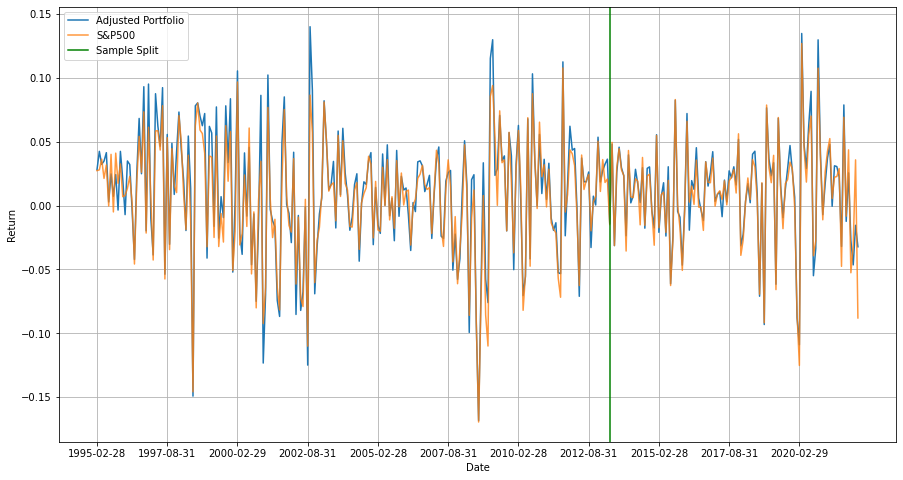

In [94]:
plt.figure(figsize = (15,8))
plt.plot(compare2['port'],label = 'Adjusted Portfolio')
plt.plot(compare2['sp500'],label = 'S&P500',alpha = 0.8)
plt.axvline(x='2013-05-31', color='g', label='Sample Split')
plt.xticks(np.arange(0,len(compare2),30))
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

* Information Ratio

In [95]:
IR2_1 = info_ratio(compare2.iloc[:-108],'sp500', 'port', 0.06/12)
IR2_1

0.39996514469642547

In [96]:
IR2_2 = info_ratio(compare2.iloc[-108:],'sp500', 'port', 0.06/12)
IR2_2

0.35592546800186264

In [97]:
IR2_3 = info_ratio(compare2,'sp500', 'port', 0.06/12)
IR2_3

0.3808547417986684

* Sharpe Ratio

In [98]:
SR2_1 = sharpe_ratio(compare2.iloc[:-108],'port',0.06/12)
SR2_1

0.17030592660362848

In [99]:
SR2_2 = sharpe_ratio(compare2.iloc[-108:],'port',0.06/12)
SR2_2

0.27350386753478634

In [100]:
SR2_3 = sharpe_ratio(compare2,'port',0.06/12)
SR2_3

0.21582653088655257

In [101]:
print('In-sample Information Coefficient: ',info_coef(weights2.iloc[:-108],actual_y.iloc[:-108]))
print('Out-of-sample Information Coefficient: ',info_coef(weights2.iloc[-108:],actual_y.iloc[-108:]))
print('Full sample Information Coefficient: ',info_coef(weights2,actual_y))

In-sample Information Coefficient:  0.09134666511480703
Out-of-sample Information Coefficient:  0.12633030165823075
Full sample Information Coefficient:  0.10589066059677023


In [102]:
print('In-sample Hit Rate: ',hit_rate(compare2.iloc[:-108], 'sp500','port'))
print('Out-of-sample Hit Rate: ',hit_rate(compare2.iloc[-108:], 'sp500','port'))
print('Full-sample Hit Rate: ',hit_rate(compare2, 'sp500','port'))

In-sample Hit Rate:  0.6284403669724772
Out-of-sample Hit Rate:  0.5833333333333333
Full-sample Hit Rate:  0.6134969325153374


In [103]:
MDD(compare2.iloc[:-108],'sp500')

-4.563328946548292

In [104]:
MDD(compare2.iloc[-108:],'sp500')

-2.815160085969353

In [105]:
print('Benchmark Maximum Drawdown: ',MDD(compare2,'sp500'))
print('In-sample Maximum Drawdown: ',MDD(compare2.iloc[:-108],'port'))
print('Out-of-sample Maximum Drawdown: ',MDD(compare2.iloc[-108:],'port'))
print('Full-sample Maximum Drawdown: ',MDD(compare2,'port'))

Benchmark Maximum Drawdown:  -4.563328946548292
In-sample Maximum Drawdown:  -4.317314929675804
Out-of-sample Maximum Drawdown:  -2.7966264187379486
Full-sample Maximum Drawdown:  -4.317314929675804


In [106]:
print('Full Sample Excess Return: ',excess_return(compare2,'sp500','port'))
print('In-Sample Excess Return: ',excess_return(compare2.iloc[:-108],'sp500','port'))
print('Out-of-Sample Excess Return: ',excess_return(compare2.iloc[-108:],'sp500','port'))

Full Sample Excess Return:  0.0037398955779102223
In-Sample Excess Return:  0.004506829742967558
Out-of-Sample Excess Return:  0.002327882295624135


In [107]:
print('Full Sample Tracking Error: ',tracking_error(compare2,'sp500','port'))
print('In-Sample Tracking Error: ',tracking_error(compare2.iloc[:-108],'sp500','port'))
print('Out-of-Sample Tracking Error: ',tracking_error(compare2.iloc[-108:],'sp500','port'))

Full Sample Tracking Error:  0.010038416823105436
In-Sample Tracking Error:  0.011590578907767999
Out-of-Sample Tracking Error:  0.007014156307888012


In [108]:
compare2['sp500_Accu'] = (1+compare2['sp500']).cumprod()
compare2['portAccu']   = (1+compare2['port']).cumprod()

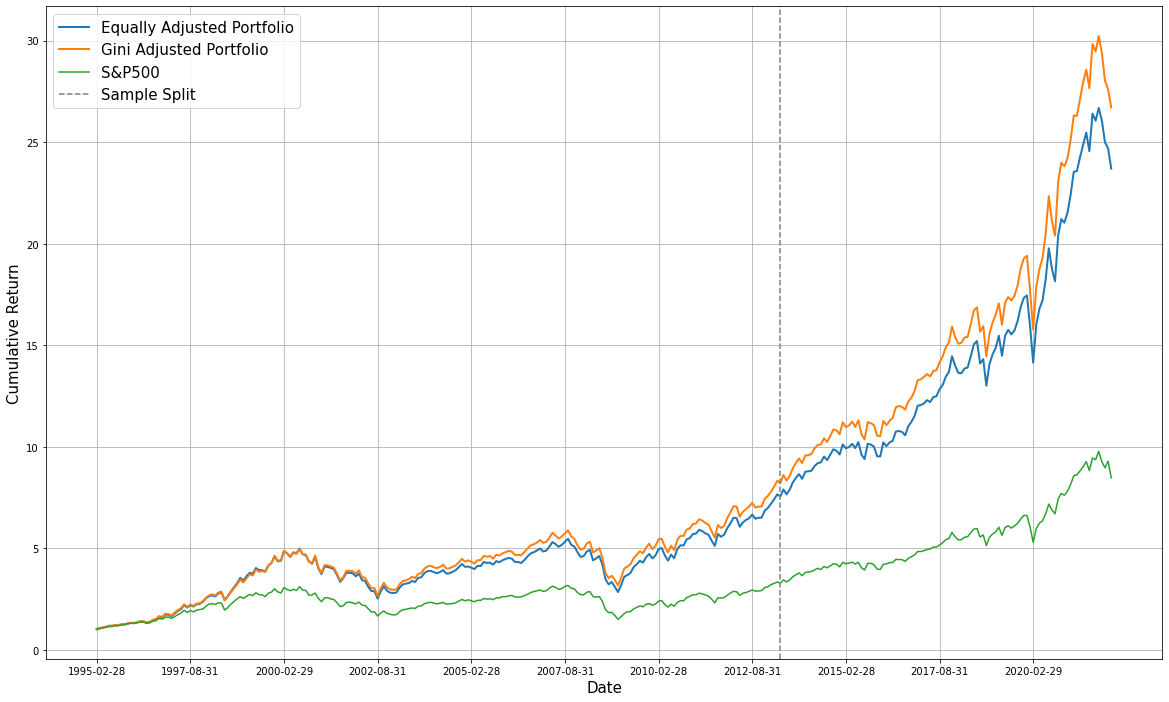

In [109]:
plt.figure(figsize = (20,12))
plt.plot(compare1['portAccu'],label = 'Equally Adjusted Portfolio',linewidth = 2)
plt.plot(compare2['portAccu'],label = 'Gini Adjusted Portfolio',linewidth = 2)
plt.plot(compare2['sp500_Accu'],label = 'S&P500')
plt.axvline(x='2013-05-31', color='grey', label='Sample Split',linestyle = '--')
plt.xticks(np.arange(0,len(compare1),30))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Cumulative Return',fontsize = 15)
plt.legend(loc = 'upper left',fontsize = 15)
plt.grid()
plt.show()

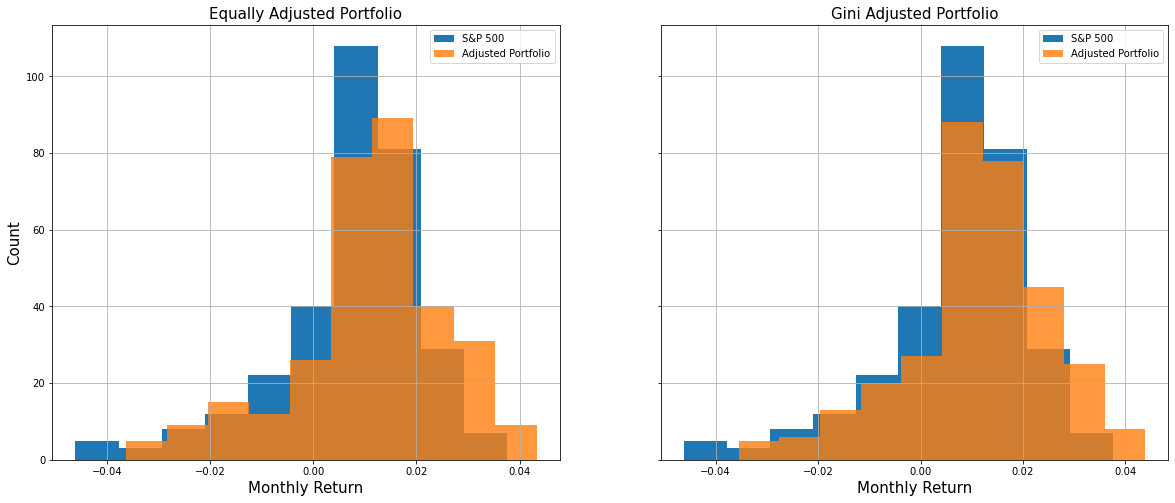

In [110]:
fig, axs = plt.subplots(1, 2,figsize = (20,8))
axs[0].hist(compare1['sp500'].rolling(12).mean(),label = 'S&P 500')
axs[0].hist(compare1['port'].rolling(12).mean(),label = 'Adjusted Portfolio',alpha = 0.8)
axs[0].set_title('Equally Adjusted Portfolio',fontsize = 15)
axs[0].legend()
axs[0].grid()
axs[1].hist(compare2['sp500'].rolling(12).mean(),label = 'S&P 500')
axs[1].hist(compare2['port'].rolling(12).mean(),label = 'Adjusted Portfolio',alpha = 0.8)
axs[1].set_title('Gini Adjusted Portfolio', fontsize = 15)
axs[1].legend()
axs[1].grid()
for ax in axs.flat:
    ax.set_xlabel('Monthly Return',fontsize = 15)
    ax.set_ylabel('Count',fontsize = 15)
for ax in axs.flat:
    ax.label_outer()
plt.show()

In [111]:
month_ind  = 3

portfolio3 = []
actual_y   = df[c].iloc[:,4:].copy()
columns    = actual_y.columns
weights3   = {}
for i in range(len(prediction)):    
    ret    = actual_y.iloc[i][~actual_y.iloc[i].isna()]    
    try:
        signal = prediction[i][0][~actual_y.iloc[i].isna()]
        gini   = prediction[i][1][~actual_y.iloc[i].isna()]
    except:
        signal = prediction[i][0]
        gini   = prediction[i][1]
    
    
    
    if i//month_ind == 0:
        
        gini   = pd.Series(gini, index = columns) 
        over   = gini[signal==1].rank(ascending = False,method='dense')
        under  = gini[signal==0].rank(ascending = False,method='dense') #+ len(over)

        #rank   = pd.concat([over,under])[columns[~actual_y.iloc[i].isna()]]

        n       = len(ret)
        over_n  = len(gini[signal==1])
        under_n = len(gini[signal==0])
        over_w  = pd.Series((np.arange(0,over_n)*(change/n)*(under_n/n)/(over_n//2))[over.astype(int)-1],index = over.index)
        under_w = pd.Series((np.arange(0,under_n)*(-change/n)*(over_n/n)/(under_n//2))[under.astype(int)-1],index = under.index)   

        reorder_w = pd.concat([over_w,under_w])[columns[~actual_y.iloc[i].isna()]].values

        reorder_w += base_w

        reorder_w /=sum(reorder_w)

        weights3[i] = reorder_w
    
    else:
        reorder_w   = base_w
        weights3[i] = reorder_w
    
    port_r = sum(reorder_w*ret)
    portfolio3.append(port_r)
    
weights3 = pd.DataFrame.from_dict(weights3).T


In [112]:
i

325

In [113]:
compare3 = df[['sp500']].copy()
compare3.reset_index(inplace = True)

compare3['port'] = pd.Series(portfolio3)
compare3.set_index('Date',inplace = True)
compare3.head()

,sp500,port
Date,,
1995-02-28,0.027329,0.028089
1995-03-31,0.027960,0.042452
1995-04-30,0.036312,0.032240
1995-05-31,0.021279,0.038702
1995-06-30,0.031776,0.039257


In [114]:
compare3['sp500_Accu'] = (1+compare3['sp500']).cumprod()
compare3['portAccu']   = (1+compare3['port']).cumprod()

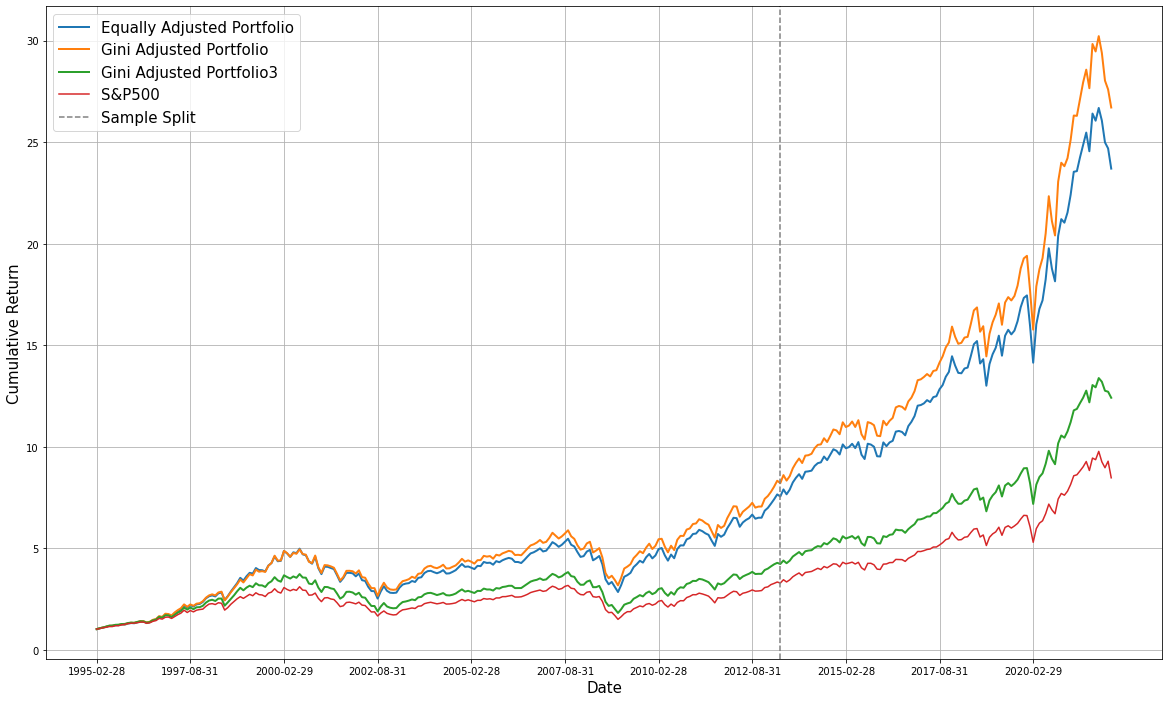

In [115]:
plt.figure(figsize = (20,12))
plt.plot(compare1['portAccu'],label = 'Equally Adjusted Portfolio',linewidth = 2)
plt.plot(compare2['portAccu'],label = 'Gini Adjusted Portfolio',linewidth = 2)
plt.plot(compare3['portAccu'],label = 'Gini Adjusted Portfolio3',linewidth = 2)

plt.plot(compare2['sp500_Accu'],label = 'S&P500')
plt.axvline(x='2013-05-31', color='grey', label='Sample Split',linestyle = '--')
plt.xticks(np.arange(0,len(compare1),30))
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Cumulative Return',fontsize = 15)
plt.legend(loc = 'upper left',fontsize = 15)
plt.grid()
plt.show()

In [116]:
test1 = compare1[compare1.index > '2013-02-01'].copy()
test2 = compare2[compare2.index > '2013-02-01'].copy()


In [117]:
test1

,sp500,port,sp500_Accu,portAccu
Date,,,,
2013-02-28,0.035988,0.029401,3.219578,7.201168
2013-03-31,0.018086,0.030074,3.277806,7.417734
2013-04-30,0.020763,0.032602,3.345863,7.659568
2013-05-31,-0.014999,-0.013261,3.295677,7.557993
2013-06-30,0.049462,0.046051,3.458688,7.906045
...,...,...,...,...
2021-11-30,0.043613,0.024108,9.778986,26.688879
2021-12-31,-0.052585,-0.023306,9.264756,26.066858
2022-01-31,-0.031360,-0.041192,8.974209,24.993118


In [118]:
test1['portAccu'] = (1+test1['port']).cumprod()
test2['portAccu'] = (1+test2['port']).cumprod()

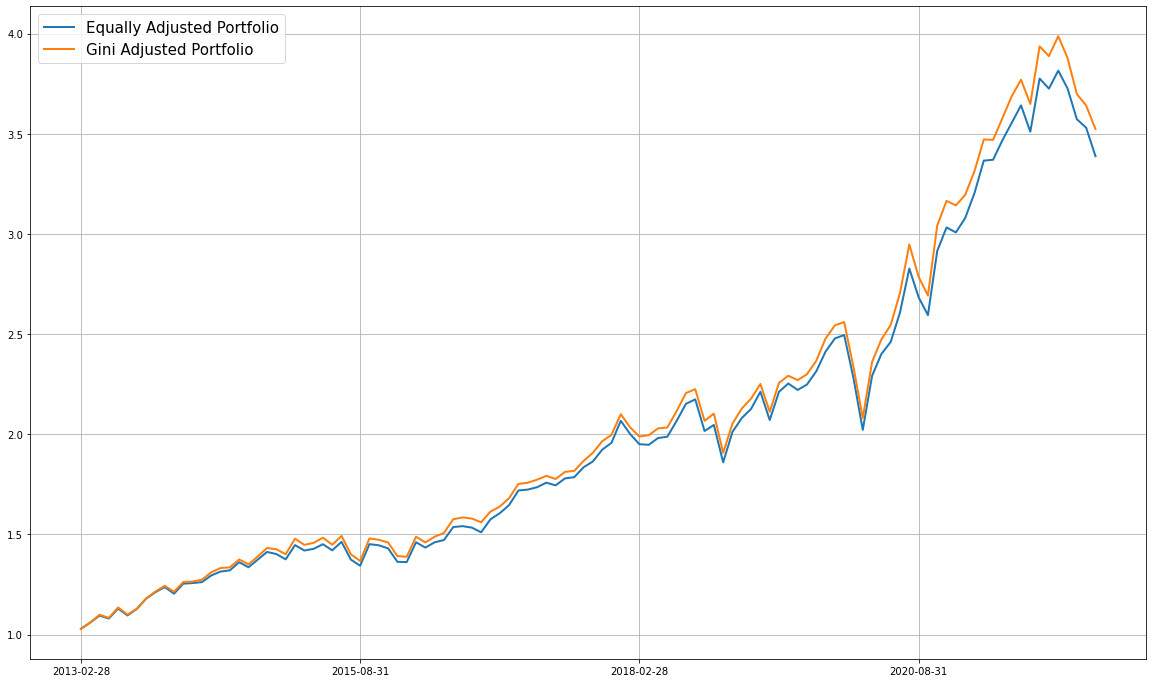

In [121]:
plt.figure(figsize = (20,12))
plt.plot(test1['portAccu'],label = 'Equally Adjusted Portfolio',linewidth = 2)
plt.plot(test2['portAccu'],label = 'Gini Adjusted Portfolio',linewidth = 2)
plt.xticks(np.arange(0,len(compare1[compare1.index > '2013-02-01']),30))
plt.legend(loc = 'upper left',fontsize = 15)
plt.grid()
plt.show()
